---
# Modelowanie skoka spadochroniarza

*Dzmitry Pihulski, Yana Negulescu* <br />
*15 stycznia, 2023*
---

## Spis treści:

1. Wstęp
2. Sformułowanie modelu matematycznego i jego opis
3. Obliczenia i analiza wyników
    - Schemat Eulera, wykres prędkości
    - Rozwiązanie równania różniczkowego w sposób zwyczajny, funkcja i wykres na prędkość spadochroniarza
    - Funkcja i wykres na długość spadochroniarza
    - Funkcja Everything about flight
4. Podsumowanie
5. Literatura


---
### 1. Wstęp

Pierwszy skok ze spadochronem został wykonany 22 października 1797 roku nad Parc Monceau w Paryżu. Francuz Andre-Jacques Garnerin skoczył z balonu na wysokości 680 metrów. Jednak jeszcze za dużo lat do tego ludzie, codziennie obserwując ptaków, byli zainteresowani możliwością lotu. Starożytne pisma mówią, że w wielu krajach ludzie próbowali skokać z wież, drzew, skał za pomocą różnych urządzeń podobnych do parasoli. Często takie skoki kończyły się traumą, a nawet śmiercią, ponieważ nikt jeszcze nie odkrył praw oporu powietrza.

W naszym projekcie będziemy symulować skok ze spadochronem. Symulacja skoku zwykle polega na wykorzystaniu modeli matematycznych i symulacji komputerowych do badania dynamiki skoka spadochroniarza. Ten rodzaj badań można wykorzystać do leprzego zrozumienia aerodynamiki skoków, wpływu różnych pozycji ciała i konstrukcji spadochronu. Wyniki symulacji mogą pomóc profesjonalistom w podejmowaniu lepszych decyzji i zwiększyć bezpieczeństwo spadochroniarzy. Naszym celem będzie wyprowadzenie równania różniczkowego opisującego skok, rozwiązanie tego równania, z którego powstaje równanie prędkości, a następnie wyprowadzenie równania na długość skoku i analiza wyników.

---
### 2. Sformułowanie modelu matematycznego i jego opis

Kiedy ciało porusza się w ośrodku gazowym lub ciekłym, tarcie ma wielki wpływ na charakter ruchu. Przedmiot spadający z dużej wysokości nie porusza się z przyspieszeniem jednostajnym, ponieważ wraz ze wzrostem prędkości rośnie siła oporu środowiska.

Nasz model rozpatruje spadochroniarza o masie $\normalsize m = 100\, kg$, spadającego w powietrzu o gęstości $\normalsize \rho = 1,29 \,\frac{kg}{m^3}$, ze spadochronem rodzaju D6, którego promień wynosi $\normalsize r = 1,29\,m$.<br /> 

Na człowieka działają trzy siły:

1. Siła grawitacji: $$\normalsize F = mg$$ <br />

2. Siła oporu środowiska dla małych prędkości. Przy stosunkowo małych prędkościach wartość siły oporu jest proporcjonalna do prędkości i zachodzi zależność:  $$\normalsize F_1 = k_1\upsilon$$ <br /> 


3. Siła oporu wiatru. Przy znacznie mniejszych prędkościach siła oporu staje się proporcjonalna do kwadratu prędkości: $$\normalsize F_2 = k_2\upsilon^2$$ <br />


</p><p align="center">
<img src="Рисунок1.png" style="width:20%; border:0;">
</p>

Z tego tworzymy równanie zgodnie z drugą zasadą Newtona: <br />

$$\large ma = -k_2\upsilon^2 -k_1\upsilon + mg$$ <br />
Gdzie:
- $\normalsize a$ – przyśpieszenie ciała, $\dfrac{m}{s^2}$, 

- $\normalsize m$ – masa ciała, $\normalsize kg$,
- $\normalsize g$ – przyśpieszenie grawitacyjne, $\normalsize g = 9,815 \,\dfrac{m}{s^2}$,
- $\normalsize \upsilon$ – prękość ciała, $\normalsize \dfrac{m}{s}$,
- $\normalsize k_1$ – zależy od właściwości środowiska i kształtu ciała: $\normalsize k_1 = 6\pi\mu r$ ($\normalsize\mu$ – lepkość dynamiczna środowiska. Przyjmiemy że $\tau = 20\,°С$ i $P = 1\, atm.$ wtedy $\mu = 0,0182 \,\frac{Ns}{м^2}$)<br />

- $\normalsize k_2$ - jest proporcjonalna do największego pola przekroju ciała $\normalsize S$, względem przepływu powietrza, oraz do gęstości środowiska $\normalsize\rho$ i zależy od kształtu ciała: $\normalsize k_2 = \frac{1}{2}c\rho S$ ($\normalsize c$ – współczynnik oporu powietrza – bezwymiarowy, przyjmujemy $c = 0,9$)<br />

**Druga zasada Newtona** to różniczkowa zasada ruchu mechanicznego, która opisuje zależność przyspieszenia ciała od wypadkowej wszystkich sił działających na to ciało i masy ciała. <br />

>W inercjalnym układzie odniesienia jeśli siły działające na ciało nie równoważą się (czyli wypadkowa sił jest różna od zera), to ciało porusza się z przyspieszeniem wprost proporcjonalnym do siły wypadkowej, a odwrotnie proporcjonalnym do masy ciała.


Teraz możemy otrzymać równanie różniczkowe: $$\large\dfrac{d\upsilon}{dt} = \dfrac{-k_2\upsilon^2-k_1\upsilon + mg}{m}$$

---
### 3. Obliczenia i analiza wyników

#### 3.1 Schemat Eulera, wykres prękości

Najpierw skorzystamy ze schematu Eulera. 

Implementacja biblioteki:

In [57]:
import math
import numpy as np
import sympy as smp
import scipy as sp
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt
import scipy.optimize

Zapisujemy wszystkie nasze wartości, definiujemy funkcję pochodnej i robimy wykres prędkośi z otrzymanych wyników.

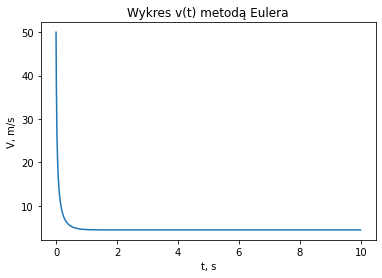

<Figure size 432x288 with 0 Axes>

In [58]:
#Wartości
m=100.0
g=9.815
v0=50.0
k1=6*math.pi*0.0182*5.17
k2=0.5*0.9*math.pi*(5.17**2)*1.29

#Funkcja pochodnej
def dv(v):
    return (m*g-k1*v-k2*(v**2))/m

#Schemat Eulera
t=np.arange(0, 10, 0.01)
y=[]
y.append(v0)
for i in range(len(t)-1):
    h=t[i+1]-t[i]
    nexty=y[i]+h*dv(y[i])
    y.append(nexty)

#Wykres prędkości
plt.plot(t, y)
plt.title('Wykres v(t) metodą Eulera')
plt.xlabel('t, s')
plt.ylabel('V, m/s')
plt.show()
plt.savefig('Wykres_v_Euler.png')

---
#### 3.2 Rozwiązanie równania różniczkowego w sposób zwyczajny, funkcja i wykres na prękość spadochroniarza

Będziemy ręcznie rozwiązywać równanie rózniczkowe: $$\normalsize\dfrac{\mathrm{d}\upsilon}{\mathrm{d}t} = \dfrac{-k_2\upsilon^2-k_1\upsilon + mg}{m}$$

Zcałkujemy to równanie: $$\normalsize\displaystyle\int\dfrac{\mathrm{d}\upsilon}{-\frac{k_2\upsilon^2}{m}-\frac{k_1\upsilon}{m}+g} = \int \mathrm{d}t$$  <br />

Wyciągamy $-\dfrac{m}{k_2}$: $$-\dfrac{m}{k_2}\displaystyle\int\dfrac{\mathrm{d}\upsilon}{(\upsilon + \dfrac{k_1}{2k_2})^2-\dfrac{k_1^2+ 4mgk_2}{4k_2}} = \int \mathrm{d}t$$  <br />

Po obliczeniach mamy: $$\dfrac{m}{\sqrt{k_1^2 + 4mgk_2}} \; \ln \dfrac{\dfrac{\sqrt{k_1^2 + 4mgk_2}}{2k_2}+\upsilon
+\dfrac{k_1}{2k_2}}{\dfrac{\sqrt{k_1^2 + 4mgk_2}}{2k_2}-\upsilon-\dfrac{k_1}{2k_2}} = t + C$$  

Gdzie $C$ wynosi: $$C = \ln \dfrac{\sqrt{k_1^2 + 4mgk_2}+k_1+2k_2\upsilon}{\sqrt{k_1^2 + 4mgk_2} - k_1-2k_2\upsilon}$$

Wtedy: $$\large\upsilon(t) = \dfrac{\sqrt{k_1^2 + 4mgk_2}\:e^\frac{\sqrt{k_1^2 + 4mgk_2}\:t}{m}\:e^c-k_1\:e^\frac{\sqrt{k_1^2 + 4mgk_2}\:t}{m}\:e^c-\sqrt{k_1^2 + 4mgk_2}-k_1}{2k_2 + 2k_2 e^\frac{\sqrt{k_1^2 + 4mgk_2}t}{m}e^c}$$

Teraz to równanie zapisujemy w kod i robimy wykres:

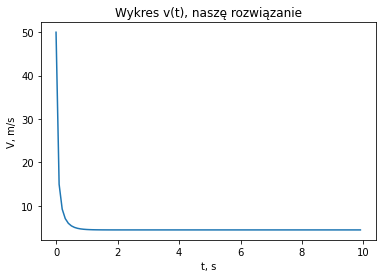

<Figure size 432x288 with 0 Axes>

In [59]:
#Funkcja prędkości
def v(t):
    answear=((math.sqrt(k1**2+4*m*g*k2))*math.exp(((math.sqrt(k1**2+4*m*g*k2))*t)/m)*(((math.sqrt(k1**2+4*m*g*k2))+k1+2*k2*v0)**2/((math.sqrt(k1**2+4*m*g*k2))**2-(k1+2*k2*v0)**2))-k1*math.exp(((math.sqrt(k1**2+4*m*g*k2))*t)/m)*(((math.sqrt(k1**2+4*m*g*k2))+k1+2*k2*v0)**2/((math.sqrt(k1**2+4*m*g*k2))**2-(k1+2*k2*v0)**2))-(math.sqrt(k1**2+4*m*g*k2))-k1)/(2*k2+2*k2*math.exp(((math.sqrt(k1**2+4*m*g*k2))*t)/m)*(((math.sqrt(k1**2+4*m*g*k2))+k1+2*k2*v0)**2/((math.sqrt(k1**2+4*m*g*k2))**2-(k1+2*k2*v0)**2)))
    return answear

#Wykres
t = np.arange(0, 10, 0.1)
list=[]
for i in range(len(t)):
    list.append(v(t[i]))
plt.plot(t, list)
plt.title('Wykres v(t), naszę rozwiązanie')
plt.xlabel('t, s')
plt.ylabel('V, m/s')
plt.show()
plt.savefig('Wykres_v.png')



---
Zauważmy, że na tym wykresie, jak i na wykresie otrzymanym za pomocą schematu Eulera, w pewnym momencie prędkość przestaje rosnąć i nie zmiania się do końca lotu. Wynika to z faktu, że ze zwiększeniem oporu rosnącym wraz z prędkością, w pewnym momencie siła oporu zrówna się z siłą grawitacji, po czym prędkość przestanie rosnąć. Od tego momentu, $\dfrac{\mathrm{d}\upsilon}{\mathrm{d}t} = 0$, wtedy tą ustaloną prędkość $\normalsize\tilde\upsilon$ jestesmy w stanie policzyć rozwiązując nie równanie różniczkowe, ale kwadratowe: $$\normalsize -k_2\upsilon^2-k_1\upsilon+mg = 0$$

Delta wynosi: $$\normalsize \Delta = k_1^2 + 4k_2mg$$

Wtedy: $$\normalsize\tilde\upsilon = \sqrt{\dfrac{k_1^2}{4k_2^2}+\dfrac{mg}{k_2}}-\dfrac{k_1}{2k_2} = 4,469 \,\dfrac{m}{s}$$

Możemy zobaczyć na wykresach, że moment ustalenia prędkości $\normalsize\tilde\upsilon$ następuje zgodnie z naszymi obliczeniami. Dzieje się to właśnie w moment otwarcia spadochronu. Z powodu gwałtownego zatrzymania wzrostu prędkości, spadochroniarz przeżywa silne pchnięcie.

<br /> Zauważmy też, że w naszym przypadku, korzystanie ze schematu Eulera było znacznie szybsze.

---
#### 3.3 Funkcja i wykres na długość spadochroniarza

Aby znaleźć równanie długości, musimy scałkować równanie prędkości. <br />W tym celu wykorzystaliśmy bibliotekę sympy, która na końcu przedstawia nam gotowe równanie długości. <br /> Zdefiniowaliśmy naszy wartości i funkcję prędkości ponownie. Ale dla wygodności przyjmiemy teraz nową stałą $\normalsize a = \sqrt{k_1^2 +4mgk_2}$. Możemy zobaczyć na poprzednich wzorach, że ten wyraz występował już wiele raz.

In [60]:
#Definiujemy constanty i v(t)
k1=6*smp.pi*0.0182*5.17
k2=0.5*0.9*smp.pi*(5.17**2)*1.29
m=100
g=9.815
a=(smp.sqrt(k1**2+4*m*g*k2))
v0=50
const=((a+k1+2*k2*v0)**2/(a**2-(k1+2*k2*v0)**2))
k1=smp.symbols('k1', real=True, positive=True)
k2=smp.symbols('k2', real=True, positive=True)
m=smp.symbols('m', real=True, positive=True)
g=smp.symbols('g', real=True, positive=True)
t=smp.symbols('t', real=True)
a=smp.symbols('a', real=True, positive=True)
const=smp.symbols('const', real=True, positive=True)

def v(t):
    answear=(a*smp.exp((a*t)/m)*const-k1*smp.exp((a*t)/m)*const-a-k1)/(2*k2+2*k2*smp.exp((a*t)/m)*const)
    return answear

print("S(t) = ") 

#Całkowanie(wzór na długość)
smp.integrate(v(t),t)

S(t) = 


m*log(exp(a*t/m) + 1/const)/k2 + t*(-a - k1)/(2*k2)

---
Teraz, żeby otrzymać wykres prędkości wracamy do biblioteki math, definiujemy wartości i funkcję długości.

In [61]:
#Wartości
m=100.0
g=9.815
v0=50.0
k1=6*math.pi*0.0182*5.17
k2=0.5*0.9*math.pi*(5.17**2)*1.29
const=((a+k1+2*k2*v0)**2/(a**2-(k1+2*k2*v0)**2))

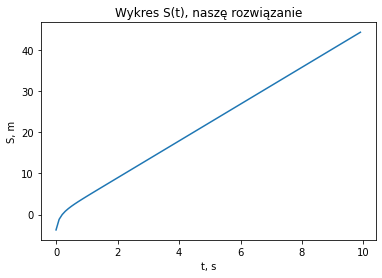

<Figure size 432x288 with 0 Axes>

In [62]:
#Funkcja długości
def S(t):
    answear=(((m*math.log(math.exp(((math.sqrt(k1**2+4*m*g*k2))*t)/(m))+(1)/((((math.sqrt(k1**2+4*m*g*k2))+k1+2*k2*v0)**2/((math.sqrt(k1**2+4*m*g*k2))**2-(k1+2*k2*v0)**2)))))/(k2))+((t*(-(math.sqrt(k1**2+4*m*g*k2))-k1))/(2*k2)))
    return answear

#Wykres
t = np.arange(0, 10, 0.1)
list=[]
for i in range(len(t)):
    list.append(S(t[i]))
plt.plot(t, list)
plt.title('Wykres S(t), naszę rozwiązanie')
plt.xlabel('t, s')
plt.ylabel('S, m')
plt.show()
plt.savefig('Wykres_S.png')

---
Na początku wykresu możemy zobaczyć tą zmianę prędkości, którą już policzyliśmy. To oznacza, że do otwierania spadochronu długość zmienia się kwadratowo, a potem już liniowo.

---
#### 3.4 Funkcja Everything about flight

Na koniec zrobiliśmy funkcję, za pomocą naszych badań w tym temacie, która może policzyć wszystkie wyniki skoku ze spadochronem oraz zrobi wykresy.

In [63]:
def everythingaboutflight(c,r,ρ,μ,S,m,g,h0,v0,t1):
    ##Deklaracja parametrów:
    if c==-1:
        c=0.9
        print('Program bierze domyślną wartość dla c, skoro nie została podana, czyli', c)
    if r==-1:
        r=5.17
        print('Program bierze domyślną wartość dla r, skoro nie została podana, czyli', r)
    if ρ==-1:
        ρ=1.29
        print('Program bierze domyślną wartość dla ρ, skoro nie została podana, czyli', ρ)
    if μ==-1:
        μ=0.0182
        print('Program bierze domyślną wartość dla μ, skoro nie została podana, czyli', μ)
    if S==-1:
        S=3.14*(r**2)
        print('Program bierze domyślną wartość dla S, skoro nie została podana, czyli pole koła dla promienia r', S)
    if m==-1:
        m=100
        print('Program bierze domyślną wartość dla m, skoro nie została podana, czyli', m)
    if g==-1:
        g=9.815
        print('Program bierze domyślną wartość dla g, skoro nie została podana, czyli', g)
    if h0==-1:
        h0=1000
        print('Program bierze domyślną wartość dla h0, skoro nie została podana, czyli', h0)
    if v0==-1:
        v0=0
        print('Program bierze domyślną wartość dla v0, skoro nie została podana, czyli', v0)
    if t1==-1:
        t1=10
        print('Program bierze domyślną wartość dla t1, skoro nie została podana, czyli', t1)


    ##Wzór na prędkość przed otwarciem spadoschronu
    def vpred(t):
        return v0+g*t

    ##Wzór na położenie przed otwarciem spadoschronu:
    def hprzed(t):
        return h0-v0*t-(g*(t**2)/2)

    ##Wzór na prędkość po otwarciu spadoschronu
    def vpo(t):
        answear=(a*math.exp((a*(t-t1))/m)*const-k1*math.exp((a*(t-t1))/m)*const-a-k1)/(2*k2+2*k2*math.exp((a*(t-t1))/m)*const)
        return answear

    ##Wzór na połóżenie po otwarciu spadoschronu
    def hpo(t):
        h=hprzed(t1)-(((m*math.log(abs(math.exp((a*t)/(m))+(1)/(const))))/(k2))+((t*(-a-k1))/(2*k2)))
        return h

    h1=h0-(g*(t1**2)/2)## wysokość na której otworzyliśmy spadoschron
    k1=6*math.pi*μ*r
    k2=0.5*c*S*ρ
    a=(math.sqrt(abs(k1**2+4*m*g*k2)))
    v1=vpred(t1)
    const=((a+k1+2*k2*v1)**2/(a**2-(k1+2*k2*v1)**2))


    ##Może za długo otwieraliśmy spadoschron? Sprawdźmy!
    if h1<=0:
        print('Za długo otwierałeś spadoschron. Już Ziemia')

    tkoncowe=scipy.optimize.fsolve(hpo, t1)[0]
    

    ##Wykres prędkości
    tprzed = np.arange(0, t1, 0.1)
    tpo=np.arange(t1, tkoncowe,0.1)
    listwynikówprzed=[]
    listawynikówpo=[]    
    for i in range(len(tprzed)):
        listwynikówprzed.append(vpred(tprzed[i]))
    for i in range(len(tpo)):
        listawynikówpo.append(vpo(tpo[i]))
    plt.plot(tprzed, listwynikówprzed)
    plt.plot(tpo, listawynikówpo)
    plt.title('Wykres v(t)', fontdict={'fontname': 'monospace', 'fontsize': 18})
    plt.xlabel('Czas w sekundach')
    plt.ylabel('Prędkość w m/s')
    plt.show()
    print('Jeżeli otwieramy spadoschron w t = ',t1,'. To cały czas lotu wynosi t = ',tkoncowe)
    print('Maksymalna prędkość pod czas lotu wynosi ',v1, 'Prędkość pod czas otwarciu spadoschronu wynosi',v1-vpo(tkoncowe), 'Prędkość z którą łądujemy się wynosi', vpo(tkoncowe))

    ##Wykres położenia
    tprzed = np.arange(0, t1+0.5, 0.1)
    tpo=np.arange(t1, tkoncowe,0.1)
    list1=[]
    list2=[]    
    for i in range(len(tprzed)):
        list1.append(hprzed(tprzed[i]))
    for i in range(len(tpo)):
        list2.append(hpo(tpo[i]))
    plt.plot(tprzed, list1)
    plt.plot(tpo, list2)
    plt.title('Wykres h(t)', fontdict={'fontname': 'monospace', 'fontsize': 18})
    plt.show()
    print('Długość lotu po otwarciu spadochronu wynosi ', h0-hprzed(t1))

---
Poniżej można zdefiniować wartości, o jakich mówiliśmy w rozdziale drugim, i otrzymać:
- wykres prędkości do i po otwarciu spadochronu
- czas lotu spadochroniarza
- maksymalną prędkość podczas lotu
- prędkość podczas otwarcia spadochronu
- prędkość łądowania
- wykres długości do i po otwarciu spadochronu
- długość lota po otwarciu spadochronu


Wartości można wprowadzić poniżej w kolejności: <br />

$(c,\, r,\, ρ,\, μ,\, S,\, m,\, g,\, h_0,\, v_0,\, t_1)$ <br />

Jeżeli wartości podane jako $-1$, program bierze domyślne wartości.

Program bierze domyślną wartość dla c, skoro nie została podana, czyli 0.9
Program bierze domyślną wartość dla r, skoro nie została podana, czyli 5.17
Program bierze domyślną wartość dla ρ, skoro nie została podana, czyli 1.29
Program bierze domyślną wartość dla μ, skoro nie została podana, czyli 0.0182
Program bierze domyślną wartość dla S, skoro nie została podana, czyli pole koła dla promienia r 83.928746
Program bierze domyślną wartość dla g, skoro nie została podana, czyli 9.815
Program bierze domyślną wartość dla v0, skoro nie została podana, czyli 0


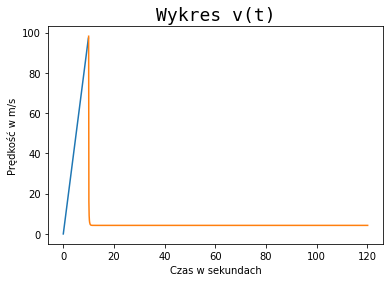

Jeżeli otwieramy spadoschron w t =  10 . To cały czas lotu wynosi t =  120.10956732290501
Maksymalna prędkość pod czas lotu wynosi  98.14999999999999 Prędkość pod czas otwarciu spadoschronu wynosi 93.91012126801753 Prędkość z którą łądujemy się wynosi 4.239878731982457


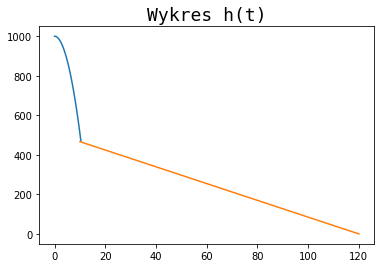

Długość lotu po otwarciu spadochronu wynosi  490.75


In [65]:
everythingaboutflight(-1,-1,-1,-1,-1,90,-1,1000,-1,10)

---
### 4. Podsumowanie

W naszym projekcie stworzyliśmy model skoku spadochroniarza, który nie jest do końca idealny, ale ma szansę na istnienie. Dowiedzieliśmy się, jak i dlaczego zmienia się prędkość i ruch spadochroniarza. Sprawdziliśmy również, że metoda Eulera ułatwia nam pracę z równaniami różniczkowymi. W dalszych badaniach można udoskonalić model, dodając do niego jeszcze jedną oś, poziomą.  Bo w naszym modelu opieraliśmy się tylko na siły działające na spadochroniarza pionowo.

---
### 5. Literatura

1. "Modelowanie ruchu spadochroniarza", praca semestralna, dyscyplina „Modelowanie matematyczne”, Białoruski Narodowy Uniwersytet Techniczny, Wydział Technologii Informacyjnych - Mińsk 2008 - https://topref.ru/referat/95026.html
2. Wikipedia - https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna